# Activity: Large Angle Pendulum

Up to now, most of your work with models in physics are those you can solve analytically, in terms of known functions. Think about solving differential equations that produce polynomials or sines and cosines. But what happens when the solution to the problem is not obviously tractable in an analytical form. Rather, how can we investigate systems that are new to us?

This activity uses the Large Angle Pendulum. You probably have seen something like this before and maybe even worked with it. Below is a figure that describes the situation. Notice a lot of the geometry work has been done for you with this figure.

<img src="https://aapt.scitation.org/na101/home/literatum/publisher/aip/journals/content/ajp/2006/ajp.2006.74.issue-10/1.2215616/production/images/large/1.2215616.figures.f1.jpeg" alt="Large Angle Pendulum" width="600"/>

In this activity you will:

- Remind yourself how to interpret a phase portrait (phase space plot) using the SHO model
- Explain what you see in the phase space figure for the SHO
- Develop the ODE for the large angle pendulum
- Show how we can recover the SHO using mathematics and graphs
- Use an existing program to work with a new system
- Explain the insights developed from a phase space plot of the Large Angle Pendulum
- (if time) Plot a trajectories in the phase space
- (if time) Add damping to the model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## The Phase Portrait of the SHO

To get this started, let's remind ourselves of the phase portrait of the SHO. Recall that we separated the second order ODE into two first order ODEs, one for $x$ and one for $v_x$,

$$\dot{x} = v_x$$
$$\dot{v}_x=-\omega^2x$$

We then map out the phase space with the following conceptual interpretation:

- Phase space is a space in which all possible states of the system can be shown
    - a state is a collection of conditions of the state (it's known position and velocity in our case)
- Each state is a unique point in phase space
    - Think about ordered Cartesian pairs, there's a pair of numbers for every point in a 2D space
- Remember that knowing $x_0$ and $v_{x,0}$ means we can know $x(t)$ for all time (for that one trajectory/particular solution) given a linear ODE

We map the differential equation to the following conceptual interpretation: **How the state changes depends on location in phase space.** We can understand this as the time derivative for $x$ and $v_x$ change throughout the space.

For our 2D SHO case we are saying that how $x$ and $v_x$ change is proportional to the position in space:

$$\langle \dot{x}, \dot{v}_x \rangle = \langle v_x, -\omega^2 x\rangle$$

The process is:

1. Determine the location(s) of interest (i.e., $x$, $v_x$)
2. Compute the change in those quantities at the location (i.e., calculate $\dot{x}$ and $\dot{v}_x$ using our prescribed 1st order ODEs above)
3. At a given point ($x_0$, $v_0$), create an arrow the indicates the direction and magnitude of the changes to $x$ and $v_x$ at that location.
    - That arrow represents the local flow of the system at that point
4. Repeat for all points of interest
5. Plot arrows to demonstrate flow of the solutions in phase space

In [2]:
def PlotPhaseSpaceAxesSHO(x, vx, N=20):

    xdot, vxdot = vx, -1*x

    plt.figure(figsize=(10,8))

    for i in np.arange(N):
    
        plt.arrow(x[i], vx[i], xdot[i], vxdot[i], 
                  head_width=0.2, 
                  head_length=0.2)
        plt.xlabel('$x$')
        plt.ylabel('$v_x$')

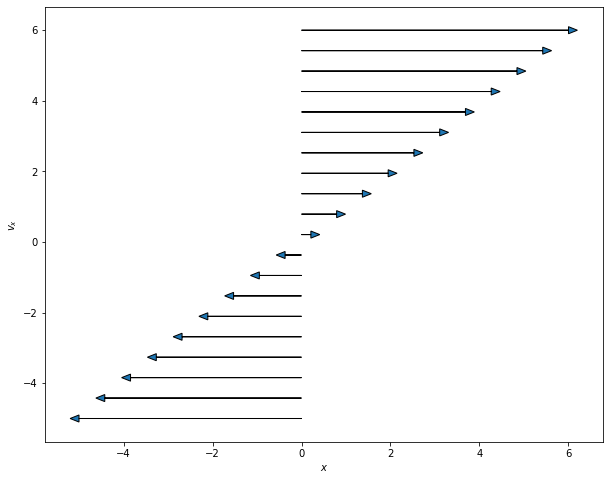

In [3]:
N = 20

x = np.zeros(N)
vx = np.linspace(-5,6,N)

PlotPhaseSpaceAxesSHO(x, vx, N)

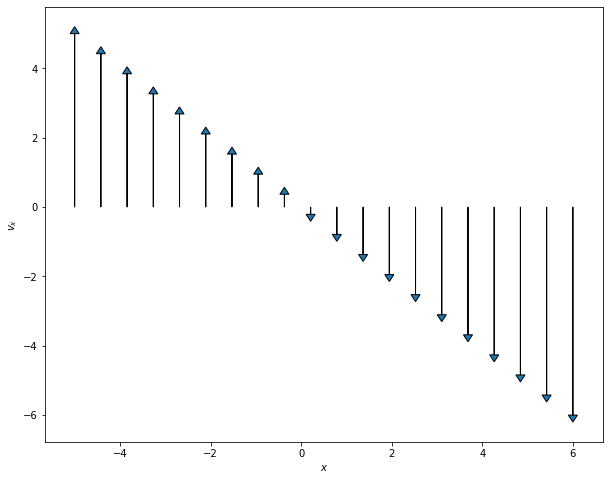

In [4]:
N = 20

x = np.linspace(-5,6,N)
vx = np.zeros(N)

PlotPhaseSpaceAxesSHO(x, vx, N)

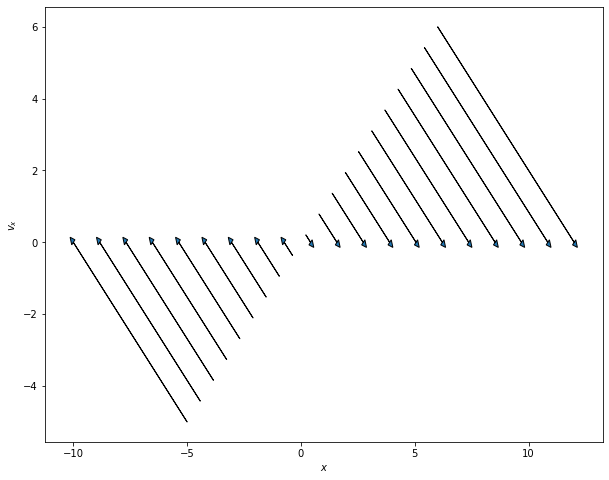

In [5]:
N = 20

x = np.linspace(-5,6,N)
vx = np.linspace(-5,6,N)

PlotPhaseSpaceAxesSHO(x, vx, N)

In [6]:
def SHOPhasePortrait(x, vx, omega = 10):
    
    xdot, vxdot = [vx, -1*omega**2*x] ## Specific to the problem
    
    return xdot, vxdot

In [7]:
def ComputeSHOPhase(X, VX, omega):
    
    xdot, vxdot = np.zeros(X.shape), np.zeros(VX.shape)

    Xlim, Ylim = X.shape
    
    for i in range(Xlim):
        for j in range(Ylim):
            xloc = X[i, j]
            yloc = VX[i, j]
            xdot[i,j], vxdot[i,j] = SHOPhasePortrait(xloc, yloc, omega)
            
    return xdot, vxdot

Text(0, 0.5, '$v_x$')

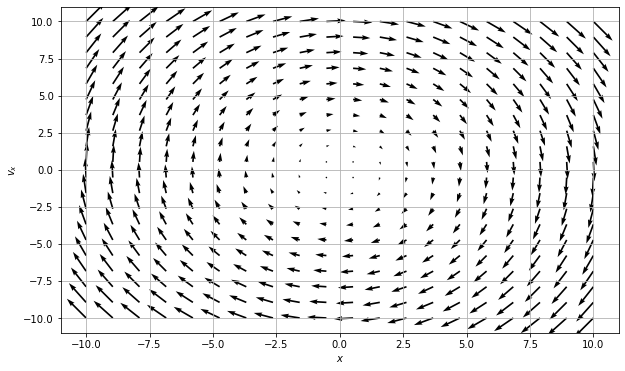

In [8]:
omega = 1

x = np.linspace(-10.0, 10.0, 20)
vx = np.linspace(-10.0, 10.0, 20)

X, VX = np.meshgrid(x, vx)

xdot, vxdot = ComputeSHOPhase(X, VX, omega)

ax = plt.figure(figsize=(10,6))
Q = plt.quiver(X, VX, xdot, vxdot, color='k')
plt.grid()

plt.xlabel('$x$')
plt.ylabel('$v_x$')

In [9]:
def LAPPhasePortrait(x, vx, omega0 = 10):
    
    xdot, vxdot = [vx, -omega0**2*np.sin(x)] ## Specific to the problem
    
    return xdot, vxdot

def ComputeLAPPhase(X, VX, omega0):
    
    xdot, vxdot = np.zeros(X.shape), np.zeros(VX.shape)

    Xlim, Ylim = X.shape
    
    for i in range(Xlim):
        for j in range(Ylim):
            xloc = X[i, j]
            yloc = VX[i, j]
            xdot[i,j], vxdot[i,j] = LAPPhasePortrait(xloc, yloc, omega0)
            
    return xdot, vxdot

Text(0, 0.5, '$v_x$')

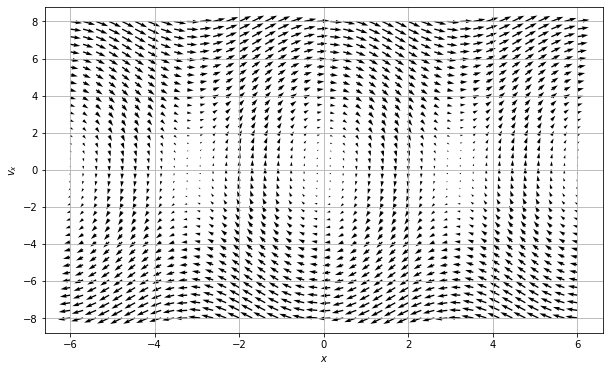

In [10]:
omega0 = 2
N = 40

x = np.linspace(-6.0, 6.0, N)
vx = np.linspace(-8.0, 8.0, N)

X, VX = np.meshgrid(x, vx)

xdot, vxdot = ComputeLAPPhase(X, VX, omega0)

ax = plt.figure(figsize=(10,6))
Q = plt.quiver(X, VX, xdot, vxdot, color='k')
plt.grid()

plt.xlabel('$x$')
plt.ylabel('$v_x$')